## Espace des phases et graphe des fonctions du modèle SIR

Ce notebook permet de tracer les graphes des fonctions des trois populations : S pour susceptible, I pour infectés, R pour rétablis,  ainsi que l'espace des phases. 
Il est inspiré d'un notebook trouvé [ici](http://scipy.github.io/old-wiki/pages/Cookbook/LoktaVolterraTutorial).

In [147]:
import numpy as np
import matplotlib 
from math import floor 
from matplotlib import pyplot as plt
from scipy.integrate import odeint
from numpy.linalg import norm
from pylab import *
import pylab as p
from scipy import integrate

import ipywidgets as widgets
from ipywidgets import (
    interactive,
    interact,
    fixed,
    FloatRangeSlider,
    FloatSlider,
    IntSlider,
    interactive_output,
    interact_manual,
    Button,
    ToggleButton

)


In [148]:
beta=1;gamma=3;N=10
def f(x,y,z):
    f=-beta*x*y
    return f
def g(x,y,z):
    g=beta*x*y-gamma*y
    return g
def h(x,y,z):
    g=gamma*y
    return g


In [149]:
def dX_dt(X, t=0):
    return array([f(X[0],X[1],X[2]),g(X[0],X[1],X[2]),h(X[0],X[1],X[2])])
t = linspace(0, 20,  1000)              # time
X0 = array([9.5,0.5,0])                # population initiales
X=integrate.odeint(dX_dt, X0, t)

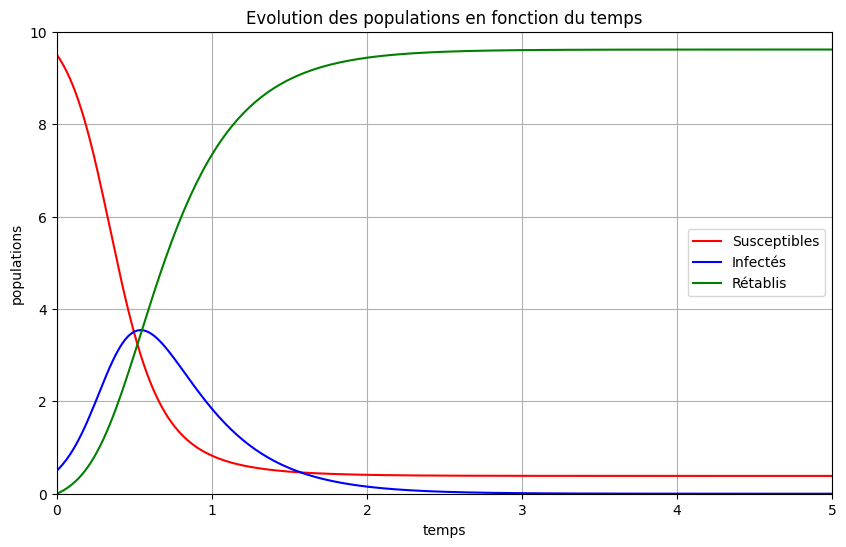

In [150]:
S,I,R = X.T
f1 = p.figure(figsize=(10,6))
plt.plot(t, S, 'r-', label='Susceptibles' )
plt.plot(t, I  , 'b-', label='Infectés')
plt.plot(t, R  , 'g-', label='Rétablis')
plt.grid()
plt.legend()#loc='best')
plt.xlabel('temps')
plt.ylabel('populations')
plt.xlim(0,5)
plt.ylim(0,10)
plt.title('Evolution des populations en fonction du temps')
f1.savefig('graphesFonctionsSIR_NP.pdf')

In [151]:
A=np.array([[sqrt(2)/2,sqrt(2)],[sqrt(3/2),0]])
A_inverse = np.array([[sqrt(2)/2,sqrt(2)],[sqrt(6)/2,0]])

def ARes(X):
    Y=A@(np.transpose(X[1:3]))
    return np.transpose(Y)


L'espace des phases avec les points fixes, les isoclines, le champ de vecteurs.


In [192]:


LTrajectories = []
global vecteurs 

vecteurs = True

def SIR(beta, gamma, N, I, R):
    
    if I+R>N:
        print('N doit être plus grand que I + R')
        return
    global O
    global f2
    O = N

    I0=I
    R0=R
    S = N-R0-I0

    t0=array([S,I,R])
    
    # Définit les equations S', I', R'
    def f(x,y,z):
        f=-beta*x*y
        return f
    def g(x,y,z):
        g=beta*x*y-gamma*y
        return g
    def h(x,y,z):
        g=gamma*y
        return g

    def dX_dt(X, t=0):
        return array([f(X[0],X[1],X[2]),g(X[0],X[1],X[2]),h(X[0],X[1],X[2])])
    t = linspace(0, 6,  500)                            #Incréments de temps
    
    f2 = plt.figure(figsize=(9, 6))

    # Mise en page
    S = np.array([N, 0, 0])
    R = np.array([0, 0, N])
    I = np.array([0, N, 0])

    plt.plot([ARes(S)[0], ARes(R)[0]], [ARes(S)[1], ARes(R)[1]], 'red')
    plt.plot([ARes(S)[0], ARes(I)[0]], [ARes(S)[1], ARes(I)[1]], 'red')
    plt.plot([ARes(I)[0], ARes(R)[0]], [ARes(I)[1], ARes(R)[1]], 'red')

    plt.scatter(ARes(S)[0], ARes(S)[1], c='red', s=50, label='S')
    plt.annotate('S=%.2f' % N, (ARes(S)[0]-0.06*N, ARes(S)[1]-0.1*N), fontsize=15)

    plt.scatter(ARes(I)[0], ARes(I)[1], c='red', s=50, label='I')
    plt.annotate('I=%.2f' % N, (ARes(I)[0], ARes(I)[1]+0.03*N), fontsize=15)

    plt.scatter(ARes(R)[0], ARes(R)[1], c='red', s=50, label='S')
    plt.annotate('R=%.2f' % N, (ARes(R)[0], ARes(R)[1]-0.1*N), fontsize=15)

    # Frontière entre épidémie et non épidémie
    if gamma/beta < N:
        C = np.array([gamma/beta, N-gamma/beta, 0])
        B = np.array([gamma/beta, 0, N-gamma/beta])
        plt.plot([ARes(C)[0], ARes(B)[0]], [ARes(C)[1], ARes(B)[1]], 'blue', lw=3)
        plt.annotate(r'S=$\gamma/\beta$',
                     (ARes(B)[0], -0.1*N), fontsize=15, color='blue')

    # Trajectoire de l'épidémie
    global L1 
    global L2
    global c

    K = integrate.odeint(dX_dt, t0, t)
    L1 = K[:, 1]*sqrt(2)/2+sqrt(2)*K[:, 2]
    L2 = sqrt(3/2)*K[:, 1]

    if gamma/beta <= t0[0]:
        c = 'black'
    else:
        c= 'red'

    plt.plot(K[:, 1]*sqrt(2)/2+sqrt(2)*K[:, 2],
                 sqrt(3/2)*K[:, 1], lw=1.5, color=c)
    plt.scatter(ARes(t0)[0], ARes(t0)[1],c='black',s=30,label='t0')
    plt.annotate('t0', (ARes(t0)[0], ARes(t0)[1]-0.05*N), fontsize=15)

    # Trajectoires sauvegardées
    for t in range(0,len(LTrajectories)):
        print(LTrajectories[t][2])
        plt.plot(LTrajectories[t][0], LTrajectories[t][1], lw = 1.5, color = LTrajectories[t][2])#c)
        plt.scatter(LTrajectories[t][0][0],LTrajectories[t][1][0], c='black', s=30,label=('t'+str(t)))
        plt.annotate('t'+str(t+1), (LTrajectories[t][0][0],LTrajectories[t][1][0]-0.05*N), fontsize=15)
        
    # Le réseau pour définir le champ de vecteurs
    if vecteurs == True:
        pas = 10
        Y = array([])
        Z = array([])
        DirY = array([])
        DirZ = array([])

        for n in range(pas+1):
            for m in range(pas+1-n):
                x1 = (n/2+m)*N*sqrt(2)/pas
                y1 = n*N*sqrt(3/2)/pas
                YZ = np.linalg.inv(A).dot(np.array([x1, y1]))
                DX = array([N+f(N-sum(YZ), YZ[0], YZ[1]), g(N-sum(YZ),
                           YZ[0], YZ[1]), h(N-sum(YZ), YZ[0], YZ[1])])
                Dx = ARes(DX)
                Y = np.append(Y, x1)
                Z = np.append(Z, y1)
                DirY = np.append(DirY, Dx[0])
                DirZ = np.append(DirZ, Dx[1])

        M = (hypot(DirY, DirZ))
        M[M == 0] = 1
        DirY /= M
        DirZ /= M
        Q = p.quiver(Y, Z, DirY, DirZ, M, pivot='tail',
                     cmap=p.cm.jet, units='xy', width=0.08)
        
    
    cbar = plt.colorbar(ticks=[1, N*4.2], orientation='vertical')
    cbar.ax.set_yticklabels(['Slow evolution', 'Fast evolution'], fontsize=15)
 
    plt.xlim(-0.1*N, 1.6*N)
    plt.ylim(-0.1*N, 1.6*sqrt(3/4)*N)

    plt.axis('on')
    
    plt.title(r'Modéle SIR, $N=$%.2f, $\beta=$%.2f, $\gamma=$%.2f, $r_0=N\beta/\gamma=$%.2f' %
              (N, beta, gamma, N*beta/(gamma)))
    plt.show()

    


# Curseurs
curseur1Layout = widgets.Layout(
    width='300px', height='30px', justify_contents='flex-start')

buttonLayout = widgets.Layout(
    width='250px', height='30px', justify_contents='flex-start')

keep = Button(description="Fixer la trajectoire",
              button_style='info', layout=buttonLayout)
erase_last = Button(description="Effacer la dernière trajectoire",
              button_style='info', layout=buttonLayout)
erase_all = Button(description="Effacer toutes les trajectoires",
              button_style='info', layout=buttonLayout)
unfreez = Button(description="Libérer les curseurs",
              button_style='info', layout=buttonLayout)
vectors = Button(description="Montrer/cacher le champs de vecteurs",
              button_style='info', layout=buttonLayout)
save = Button(description="Sauvegarder la figure",
              button_style='info', layout=buttonLayout)

beta = FloatSlider(min=0.01, max=10, value=1,
                         description='beta', layout=curseur1Layout)
gamma = FloatSlider(min=0.01, max=10, value=3,
                         description='gamma', layout=curseur1Layout)

N = IntSlider(min=0, max=15, value=10,
                         description='N', layout=curseur1Layout)
I = IntSlider(min=0, max=O, value=1,
                         description='I', layout=curseur1Layout)
R = IntSlider(min=0, max=O, value=0,
                         description='R', layout=curseur1Layout)

# Boutons
def on_keep_clicked(_):
    global LTrajectories, gamma, beta, u
    LTrajectories.append([L1,L2,c])
    print(L)
    for u in [gamma, beta, N]:
        u.disabled = True
keep.on_click(on_keep_clicked)

def on_unfreez_clicked(_):
    for u in [beta, gamma, N]:
        u.disabled = False
unfreez.on_click(on_unfreez_clicked)

def on_vectors_clicked(_):
    global vecteurs
    if vecteurs == True:
        vecteurs = False
    else:
        vecteurs = True
    graph_et_curseurs
vectors.on_click(on_vectors_clicked)

def on_save_clicked(_):
    f2.savefig('PhaseModeleSir')
save.on_click(on_save_clicked)

def on_erase_last_clicked(_):
    global LTrajectories
    LTrajectories = LTrajectories[0:len(LTrajectories)-1]
    if len(LTrajectories) == 0:
        for u in [beta, gamma, N]:
            u.disabled = False
erase_last.on_click(on_erase_last_clicked)

def on_erase_all_clicked(_):
    global LTrajectories
    LTrajectories = []
    if len(LTrajectories) == 0:
        for u in [beta, gamma, N]:
            u.disabled = False
erase_all.on_click(on_erase_all_clicked)

# Mise en page
boutons = widgets.VBox([keep, unfreez, vectors, save, erase_last, erase_all])
curseursi = widgets.VBox([N, I, R])
curseursf = widgets.VBox([beta,gamma])
curseurs = widgets.VBox([curseursi, curseursf, boutons])
main = widgets.interactive_output(SIR, {'beta': beta, 'gamma': gamma, 'N':N, 'I':I, 'R':R})
graph_et_curseurs = widgets.HBox([main, curseurs])

graph_et_curseurs


NameError: name 'O' is not defined